# Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

Steps and Tasks:

Exploratory Data Quality Report Reflecting the Following:
* Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)
* Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
* Feature Engineering techniques(10 marks)
* Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
* Get the data model ready and do a train test split.
* Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

Creating the Model and Tuning It:
* Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
* Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
 
## Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Model Tuning
- Implementing the process through Pipeline

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [196]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

### 2. Import the dataframes that are needed
- Import "concrete.csv"

In [197]:
df = pd.read_csv("concrete.csv")  # Read the data regarding  concrete strength

print(df.shape)
df.head()  # the combined dataframe

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 3. Print the number of missing values in each of the columns

In [198]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [199]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts)  

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Observation:
* No Missing values in any row
* All of the data in the dataset is numerical
* Age data appears to have outliers because max value is very large as compared to 3rd IQR value

# Exploratory Data Analysis

### Print correlation

In [201]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [202]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


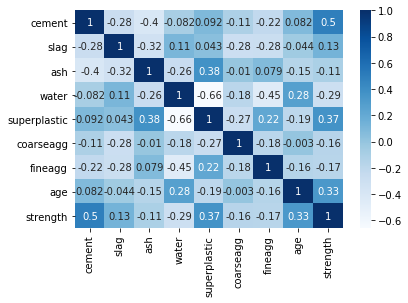

In [203]:
sns.heatmap(cor, annot=True, cmap='Blues')

- There is no obvious correlation that we can see. We cannot drop any of the variables

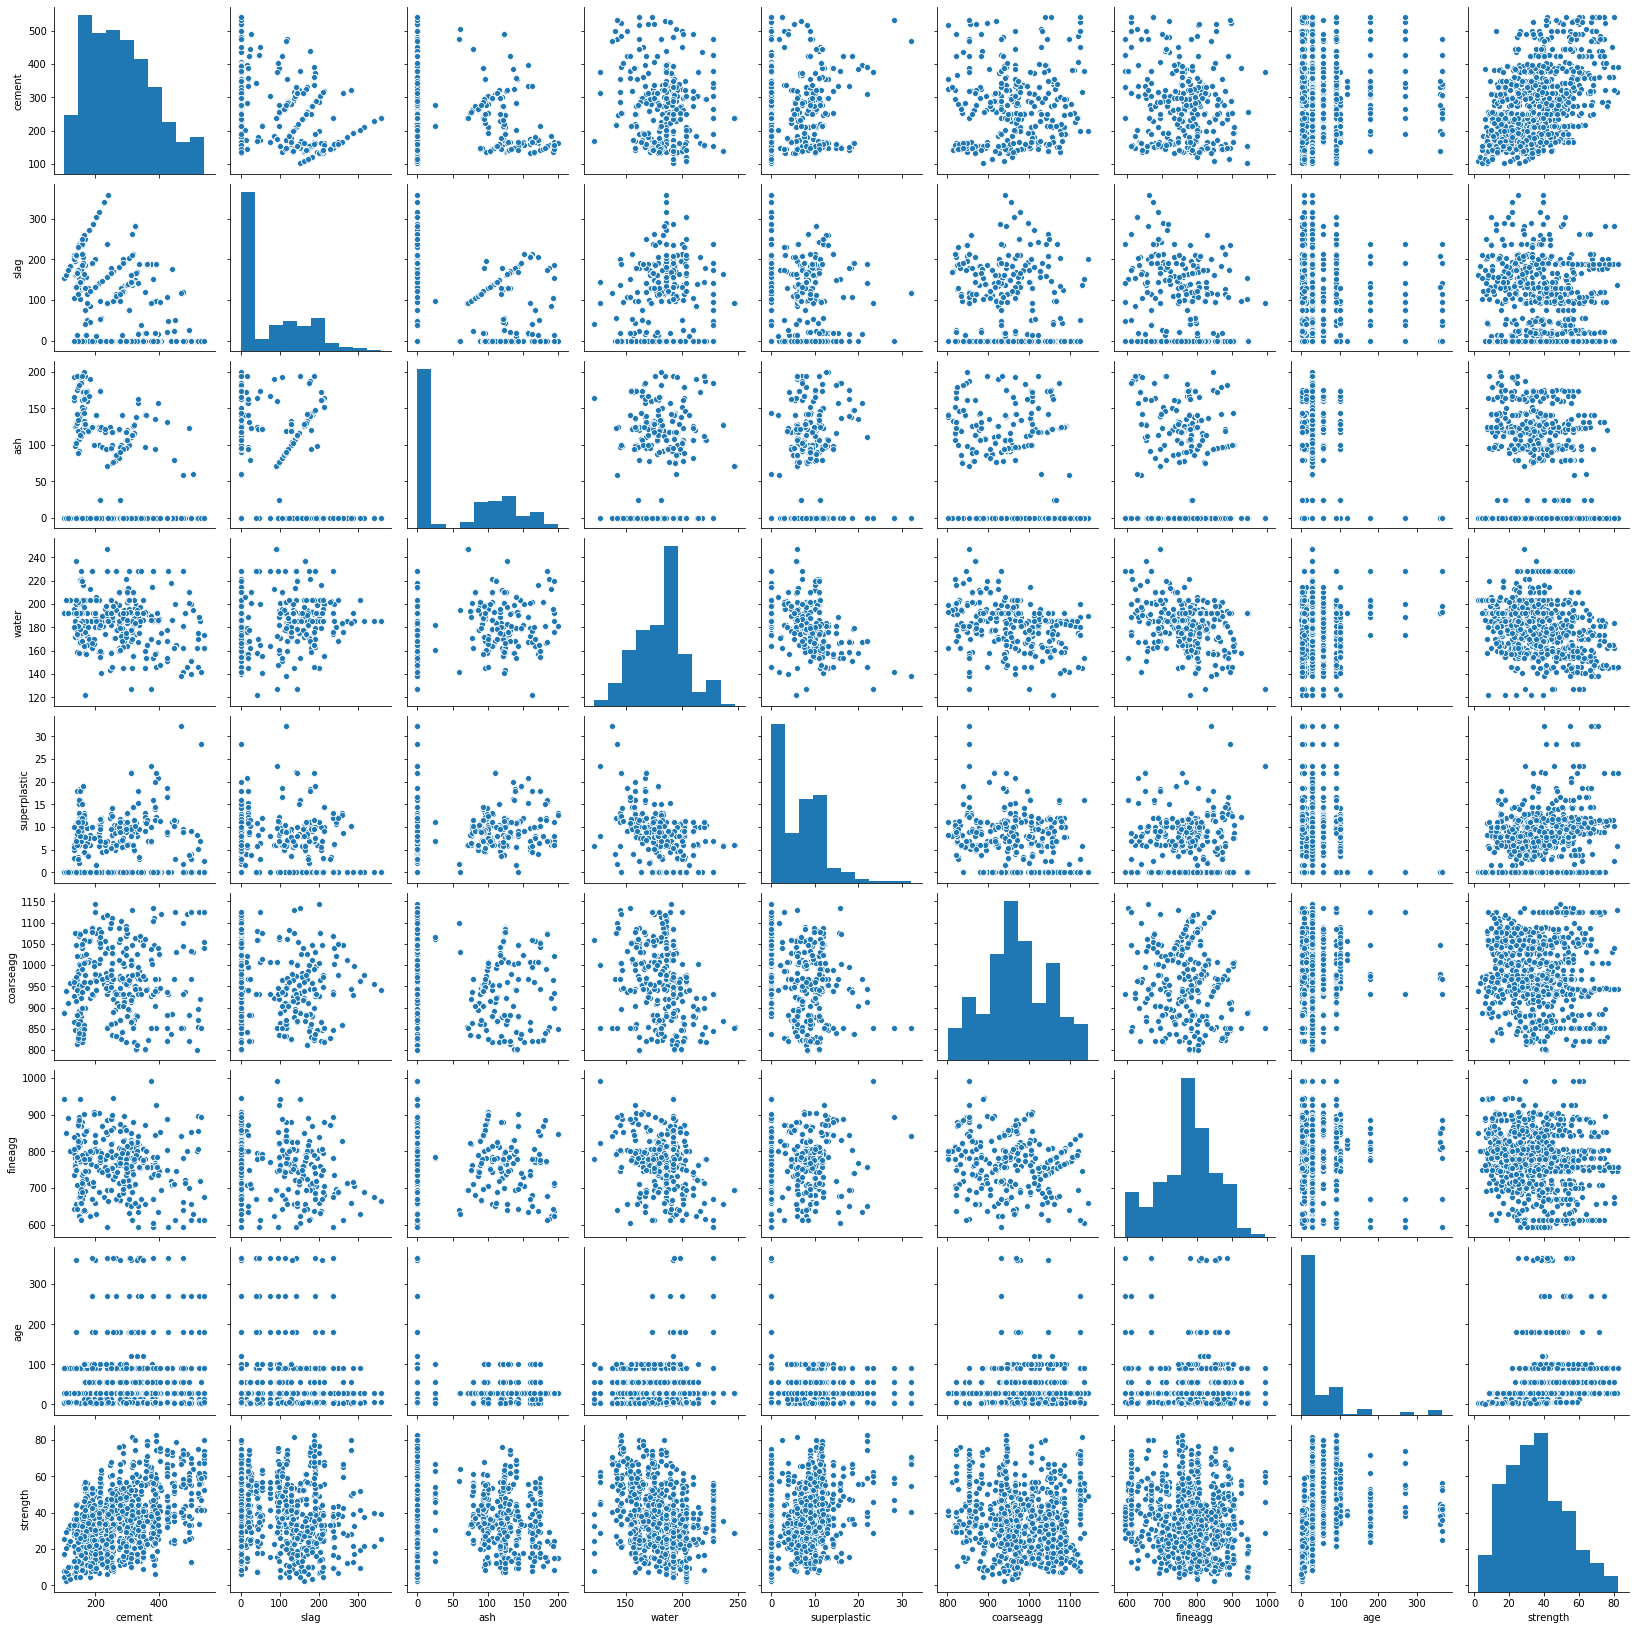

In [204]:
sns.pairplot(df) # We can use pairplot to plot pairwise relations between all the features.

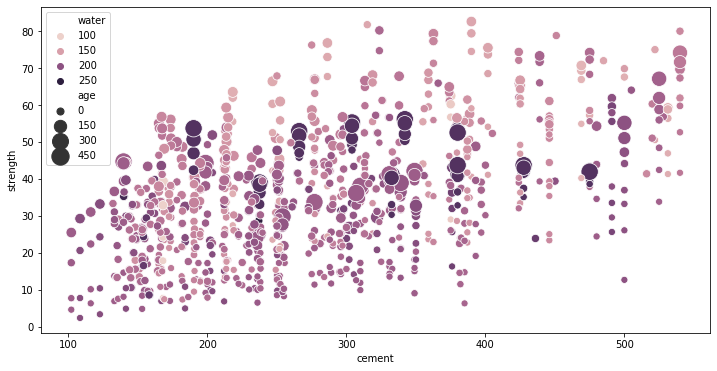

In [205]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=df, sizes=(50, 300))

## The observations from above plot:
* Strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis.
* Strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.
* Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.
* The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
* Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

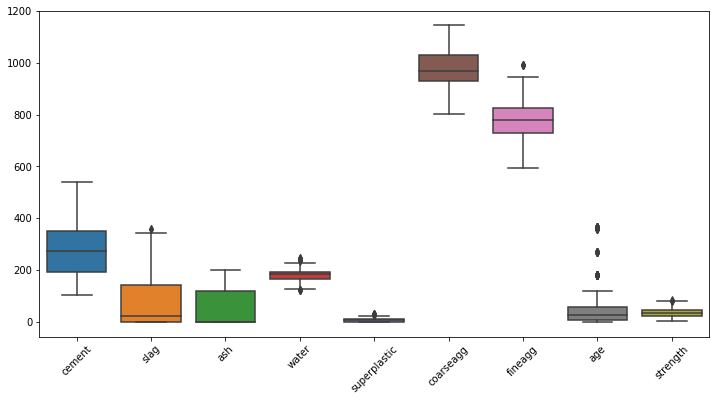

In [206]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## The observations from above plot:

* Age column appears to be having maximum number of outliers
* Slag, Water, superplastic, fineagg features have some outliers
* All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias in algorithms

# Distribution of independent variables

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


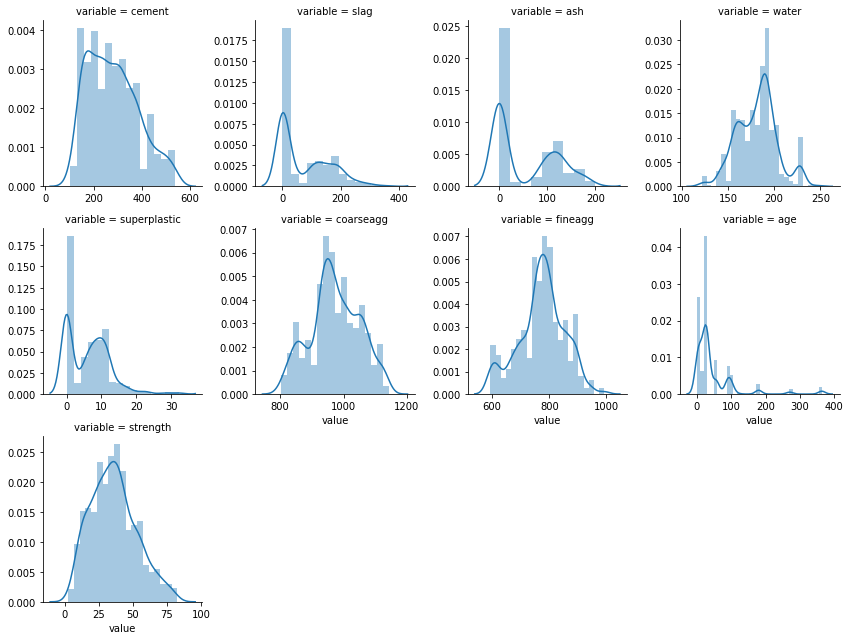

In [208]:
#cols = [i for i in df.columns if i != 'strength']
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

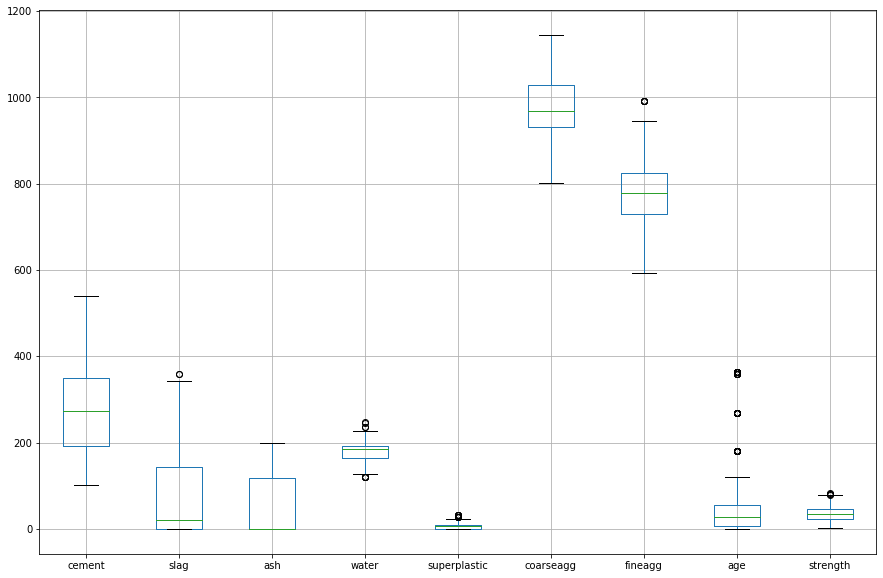

In [209]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [210]:
X = df.iloc[:,df.columns !='strength']
Y = np.array(df['strength'])

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(df_normalized,Y,columns = X.columns)
#df_normalized = pd.DataFrame(df_normalized,columns = X.columns)

In [211]:
xtrain,xtest,ytrain,ytest = train_test_split(df_normalized,Y,test_size = 0.3 , random_state=7)

# LinearRegression , Ridge and Lasso

### Linear Regression

In [212]:
lm = LinearRegression() # Linear regression

lm.fit(xtrain,ytrain)

y_predict_lm = lm.predict(xtest)

print("Linear Regression Training score = ",lm.score(xtrain,ytrain))
print("Linear Regression Testing score = ",lm.score(xtest,ytest))

Linear Regression Training score =  0.6108613237504796
Linear Regression Testing score =  0.6228785273568748


In [213]:
lm.coef_

array([ 49.32619692,  34.56141251,  14.48510635, -22.36791159,
        10.43632415,   4.10844232,   2.90475588,  40.79452653])

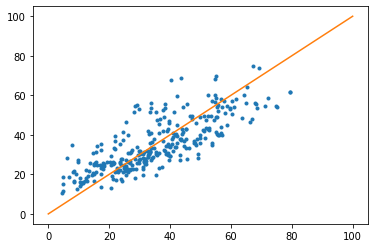

In [214]:
plt.plot(ytest, y_predict_lm, '.')
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)
plt.show()

### Ridge / Lasso

In [215]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [216]:
#Building Ridge model on first instance of lm
ridge = Ridge(alpha=.3)
ridge.fit(xtrain,ytrain)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 46.041426    31.30524148  12.36185599 -24.54665915  10.86290205
   1.92830028  -0.23342589  39.90462921]


In [217]:
lasso = Lasso(alpha=0.2)
lasso.fit(xtrain,ytrain)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 36.391445    20.52233514   4.5455564  -16.69502178  14.41703905
  -0.          -0.          30.39312681]


In [218]:
print("lm - training score ",lm.score(xtrain, ytrain))
print("lm - test score ",lm.score(xtest, ytest))
print("ridge - training score ",ridge.score(xtrain, ytrain))
print("ridge - test score ",ridge.score(xtest, ytest))
print("lasso - training score ",lasso.score(xtrain, ytrain))
print("lasso - test score ",lasso.score(xtest, ytest))

lm - training score  0.6108613237504796
lm - test score  0.6228785273568748
ridge - training score  0.6104845067964426
ridge - test score  0.6203366575607524
lasso - training score  0.579332279750538
lasso - test score  0.5891759839208279


## Decision tree

In [219]:
dt = DecisionTreeRegressor()

dt.fit(xtrain, ytrain)

score3 = dt.score(xtest, ytest)
pred = dt.predict(xtest)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.836136234205579


## RandomForestRegressor

In [220]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(xtrain, ytrain)

score4 = rf.score(xtest,ytest)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9173770512209121


## AdaBoostRegressor

In [221]:
from sklearn.ensemble import AdaBoostRegressor

adaBoost = AdaBoostRegressor()

adaBoost.fit(xtrain, ytrain)

score5 = adaBoost.score(xtest, ytest)
pred = adaBoost.predict(xtest)

print(f"AdaBoost Regressor accuracy score: {score5}")

AdaBoost Regressor accuracy score: 0.7580409136119451


## BaggingRegressor

In [222]:
from sklearn.ensemble import BaggingRegressor

regr = BaggingRegressor()

regr.fit(xtrain, ytrain)

score6 = regr.score(xtest, ytest)
pred = regr.predict(xtest)

print(f"Bagging Regressor accuracy score: {score6}")

Bagging Regressor accuracy score: 0.8954895906072834


### Accuracy scores for linear Models

In [223]:
print("Linear Regression Testing score = ",lm.score(xtest,ytest))
print(f"Decision tree acccuracy score: {score3}")
print(f'Random Forest accuracy score = {score4}')
print(f"AdaBoost Regressor accuracy score: {score5}")
print(f"Bagging Regressor accuracy score: {score6}")

Linear Regression Testing score =  0.6228785273568748
Decision tree acccuracy score: 0.836136234205579
Random Forest accuracy score = 0.9173770512209121
AdaBoost Regressor accuracy score: 0.7580409136119451
Bagging Regressor accuracy score: 0.8954895906072834


# PolynomialFeatures (degree 2)

In [224]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(df_normalized)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.30, random_state=7)
X_train.shape

(721, 37)

## Linear regression

In [225]:
lm.fit(X_train,y_train)

y_predict_lm = lm.predict(X_test)

print("Linear Regression Training score = ",lm.score(X_train,y_train))
print("Linear Regression Testing score = ",lm.score(X_test,y_test))

Linear Regression Training score =  0.7596579575557465
Linear Regression Testing score =  0.7341915158277588


In [226]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  0.          36.41451     -2.60708192 -15.58778754  21.76347232
   2.1013483  -10.01169902 -43.38080158  28.07682116  20.97428166
  20.23250383 -38.83761964 -20.75321176  20.76671807  27.96879794
  30.97252761  20.10573486  -8.56135828   0.95213701  -4.55315832
  48.99290474  56.52573179 -18.09595193 -26.73129081   6.84446863
  38.49090826  85.20609703  22.2042323  -31.87528186  -3.81842349
 -46.67201571  27.25529675  -3.61552089  78.23029144  22.03898282
  -5.77678535  27.22884695]


In [227]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7515823538736117
0.7445297867515261


In [228]:
lasso = Lasso(alpha=0.0009)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [  0.          55.93057464   0.18052899  -8.96158457  54.71415181
  15.68779206  -5.02595896 -53.12273447  -7.02392072  26.34417933
  22.89507275 -77.70910877 -41.43208675  15.56125199  30.70657857
  71.30133865  27.25916016 -30.1821035  -11.99634231  -3.24388353
  57.73492278  91.87786008 -39.8552325  -39.80167182   5.25890601
  44.05177372 116.8468947   23.21266464 -40.62614836  -1.94760915
 -45.73201287  28.6244837   -0.          67.46363352  27.40591652
 -10.78351277  53.85538856]


In [229]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7580466403335089
0.739316077199333


## Decision Tree

In [230]:
dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8384055624090431


## RandomForestRegressor

In [231]:
from sklearn.ensemble import RandomForestRegressor

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9159241932478482


## AdaBoostRegressor

In [232]:
adaBoost.fit(X_train, y_train)

score5 = adaBoost.score(X_test, y_test)

print(f"AdaBoost Regressor acccuracy score: {score5}")

AdaBoost Regressor acccuracy score: 0.8263829221748894


## BaggingRegressor

In [233]:
regr.fit(X_train, y_train)

score6 = regr.score(X_test, y_test)

print(f"Bagging Regressor acccuracy score: {score6}")

Bagging Regressor acccuracy score: 0.9035957582142132


### Accuracy scores for Quadratic Models

In [234]:
print("Linear Regression Testing score = ",lm.score(X_test,y_test))
print(f"Decision tree acccuracy score: {score3}")
print(f'Random Forest accuracy score = {score4}')
print(f"AdaBoost Regressor accuracy score: {score5}")
print(f"Bagging Regressor accuracy score: {score6}")

Linear Regression Testing score =  0.7341915158277588
Decision tree acccuracy score: 0.8384055624090431
Random Forest accuracy score = 0.9159241932478482
AdaBoost Regressor accuracy score: 0.8263829221748894
Bagging Regressor accuracy score: 0.9035957582142132


# PolynomialFeatures (degree 3)

In [235]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(df_normalized)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.30, random_state=7)
X_train.shape

(721, 93)

## Linear

In [236]:
lm.fit(X_train,y_train)

y_predict_lm = lm.predict(X_test)

print("Linear Regression Training score = ",lm.score(X_train,y_train))
print("Linear Regression Testing score = ",lm.score(X_test,y_test))

Linear Regression Training score =  0.8151581813572895
Linear Regression Testing score =  0.7393473973939286


## Decision Tree

In [237]:
dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8001247077678498


## Random Forest

In [238]:
rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.914083491497555


## AdaBoostRegressor

In [239]:
adaBoost.fit(X_train, y_train)

score5 = adaBoost.score(X_test, y_test)

print(f"AdaBoost Regressor acccuracy score: {score5}")

AdaBoost Regressor acccuracy score: 0.8319475943447826


## BaggingRegressor

In [240]:
regr.fit(X_train, y_train)

score6 = regr.score(X_test, y_test)

print(f"Bagging Regressor acccuracy score: {score6}")

Bagging Regressor acccuracy score: 0.8967034533675674


### Accuracy scores for Higher order Models

In [241]:
print("Linear Regression Testing score = ",lm.score(X_test,y_test))
print(f"Decision tree acccuracy score: {score3}")
print(f'Random Forest accuracy score = {score4}')
print(f"AdaBoost Regressor accuracy score: {score5}")
print(f"Bagging Regressor accuracy score: {score6}")

Linear Regression Testing score =  0.7393473973939286
Decision tree acccuracy score: 0.8001247077678498
Random Forest accuracy score = 0.914083491497555
AdaBoost Regressor accuracy score: 0.8319475943447826
Bagging Regressor accuracy score: 0.8967034533675674


# Conclusion:

We can see that 
* For Decision Tree , Random Forest and Bagging Regressor Quadratic model gives best score.
* For Linear Regression and AdaBoost Regressor Higher order ( degree 3) model give best score

# Model tuning

## Spliting data in train, validate and test sets

In [242]:
#Split data into train, validation and test set
train, validate, test = np.split(df.sample(frac=1, random_state=7), [int(.6*len(df)), int(.8*len(df))])

In [243]:
train_Y = train['strength']
train.drop(['strength'],axis=1,inplace = True)
train_X = train
train_X_normalized = scaler.fit_transform(train_X)
train_X_normalized = pd.DataFrame(train_X_normalized,columns = train_X.columns)

In [244]:
validate_Y = validate['strength']
validate.drop(['strength'],axis=1,inplace = True)
validate_X = validate
validate_X_normalized = scaler.fit_transform(validate_X)
validate_X_normalized = pd.DataFrame(validate_X_normalized,columns = validate_X.columns)

In [245]:
test_Y = test['strength']
test.drop(['strength'],axis=1,inplace = True)
test_X = test
test_X_normalized = scaler.fit_transform(test_X)
test_X_normalized = pd.DataFrame(test_X_normalized,columns = test_X.columns)

## DecisionTreeRegressor ( GridSearchCV &  K-Fold CV)

In [246]:
from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeRegressor(criterion  = 'mse',random_state=7) # Decision Tree

cross_val_score(dt_model, train_X_normalized, train_Y , cv=10) # No. of folds = 10

array([0.86964793, 0.85171007, 0.7384594 , 0.76422036, 0.68168403,
       0.60012855, 0.72535169, 0.74312499, 0.82189045, 0.87025724])

In [247]:
maxdepth = range(1,20)
minsampleaf = range(3,7)
param_grid = {
    'max_depth' : maxdepth,
    'min_samples_leaf' : minsampleaf
}
dtc_cv= GridSearchCV(estimator=dt_model, param_grid=param_grid)
dtc_cv.fit(train_X_normalized, train_Y)

print("Best Params for Decision Tree Regressor =", dtc_cv.best_params_)

print(f"DecisionTree Regressor Validation accuracy score =  {dtc_cv.score(validate_X_normalized, validate_Y)}")

Best Params for Decision Tree Regressor = {'max_depth': 15, 'min_samples_leaf': 3}
DecisionTree Regressor Validation accuracy score =  0.7454540695343201


In [248]:
DT_model = DecisionTreeRegressor(min_samples_leaf= 5, max_depth= 12, criterion= 'mse',random_state=7)
DT_model.fit(train_X_normalized,train_Y)
pred_DT_Y = DT_model.predict(test_X_normalized)
DT_model.score(test_X_normalized,test_Y)
print(f"DecisionTree Regressor Testing accuracy score using best parmas: {DT_model.score(test_X_normalized,test_Y)}")

DecisionTree Regressor Testing accuracy score using best parmas: 0.8077687834265551


## RandomForestRegressor ( GridSearchCV &  K-Fold CV)

In [249]:
from sklearn.ensemble import RandomForestRegressor
# Perform Grid-Search
gsc = GridSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
grid_result = gsc.fit(train_X_normalized, train_Y)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=7,
                            verbose=False)

# Perform K-Fold CV
scores = cross_val_score(rfr, train_X_normalized, train_Y, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-3.69987569 -4.97864845 -4.91773536 -5.79208394 -4.59629978 -5.1636904
 -4.67296016 -4.00069023 -4.7079265  -4.53556834]


In [250]:
print(grid_result,best_params)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [251]:
# Using Best values run RandomForestRegressor

rfmodel = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=7,
                                verbose=False)

rfmodel.fit(train_X_normalized,train_Y)

rf_y_pred = rfmodel.predict(validate_X_normalized)

In [252]:
print(f"Random Forest Regressor training accuracy score using best parmas: {rfmodel.score(train_X_normalized,train_Y)}")
print(f"Random Forest Regressor Validation accuracy score using best parmas: {rfmodel.score(validate_X_normalized,validate_Y)}")

Random Forest Regressor training accuracy score using best parmas: 0.923651060516964
Random Forest Regressor Validation accuracy score using best parmas: 0.8439912606801184


In [253]:
print(f"Random Forest Regressor Testing accuracy score using best parmas: {rfmodel.score(test_X_normalized,test_Y)}")

Random Forest Regressor Testing accuracy score using best parmas: 0.8717228691890149


# Pipeline ( Standardization of process)

## DecisionTreeRegressor

In [254]:
from sklearn.pipeline import Pipeline

dt_pipe = Pipeline(steps=[('scalar', MinMaxScaler()),
                      ('classifier', DecisionTreeRegressor(min_samples_leaf= 5, max_depth= 12, criterion= 'mse',random_state=7))])

In [255]:
dt_pipe.fit(train_X_normalized,train_Y)

Pipeline(memory=None,
         steps=[('scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=12, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=5, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=7,
                                       splitter='best'))],
         verbose=False)

In [256]:
print(f"Decision Tree Regressor Testing accuracy score using Pipeline: {dt_pipe.score(test_X_normalized,test_Y)}")

Decision Tree Regressor Testing accuracy score using Pipeline: 0.8077687834265551


## RandomForestRegressor

In [257]:
rf_pipe = Pipeline(steps=[('scalar', MinMaxScaler()),
                      ('classifier', RandomForestRegressor(max_depth=6, n_estimators=1000,random_state=7,verbose=False))])

In [258]:
rf_pipe.fit(train_X_normalized,train_Y)

Pipeline(memory=None,
         steps=[('scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=6,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=7,
                                       verbose=False, warm_start=False))],
         verbose=False)

In [259]:
print(f"Random Forest Regressor Testing accuracy score using best parmas: {rf_pipe.score(test_X_normalized,test_Y)}")

Random Forest Regressor Testing accuracy score using best parmas: 0.8717228691890149


# Conclusion:

After applying Feature engineering and model tuning RandomForestRegressor gives score of 87.17 %